# To build up Bangla Sentiment Analyzer we have to go though 3 steps
# 1. Building up custom corpora , Preprocessing of texts and converting to vector
# 2. Train different Estimator
# 3. Evaluate Estimator models

## Building up custom corpora and reading it through corpus reader

In [1]:
import os

In [2]:
import os.path

### Firstly a corpus named Bangla is created which is located at ~/nltk_data/corpora/Bangla. Snapshot of desired folder is given below

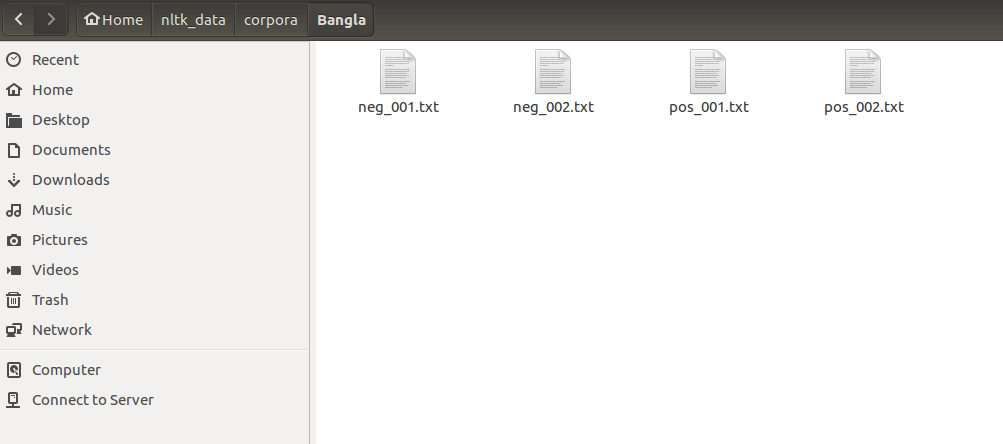

In [3]:
from IPython.display import Image
Image('pics/Bangla_data_path.png')

In [4]:
path = os.path.expanduser('~/nltk_data/corpora/Bangla')

### Now the next step will be reading these files with nltk corpus reader. For reading categorized data we will use CategorizedPlaintextCorpusReader. Arguments used ( path of the directory, regular expression to match file name, cat_pattern to extract categories from file names )

In [5]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader

In [6]:
from nltk import RegexpTokenizer

### For Bengali Unicode go to this [link](http://jrgraphix.net/r/Unicode/0980-09FF). Which is used in word_tokenize.

In [7]:
word_tokenize = RegexpTokenizer("[\u0980-\u09FF']+")

### The PunktSentenceTokenizer class uses an unsupervised learning algorithm to learn what constitutes a sentence break.

In [8]:
from nltk.tokenize import PunktSentenceTokenizer

In [9]:
sent_tokenize = PunktSentenceTokenizer()

In [10]:
reader = CategorizedPlaintextCorpusReader(path,r'.*\.txt',cat_pattern=r'(.*)_.*',word_tokenizer=word_tokenize,sent_tokenizer=sent_tokenize)

In [11]:
reader.categories()

['neg', 'pos']

In [12]:
reader.fileids(categories='pos')

['pos_001.txt', 'pos_002.txt']

In [13]:
reader.sents(fileids='pos_002.txt')

[['তিন', 'বন্ধু', 'একটি', 'বিল্ডিংয়ের', '১০৮', 'তলায়', 'থাকে', 'তারা', 'তিনজন', 'প্রতিদিন', 'লিফট', 'দিয়ে', 'বাসায়', 'আসা', 'যাওয়া', 'করে', 'একদিন', 'লিফট', 'নষ্ট', 'হয়ে', 'যায়', 'তাই', 'তাদের', 'সিঁড়ি', 'দিয়ে', 'আজ', 'উঠতে', 'হবে', 'তখন', 'এক', 'বন্ধু', 'বলল', 'আমাদের', 'মধ্য', 'হতে', 'দুইজন', 'দুইটা', 'হাসির', 'গল্প', 'বলবে', 'আর', 'একজন', 'একটা', 'কষ্টের', 'গল্প', 'বলবে', 'তাহলে', 'আমরা', 'গল্পগুলো', 'এনজয়', 'করতে', 'করতে', '১০৮', 'তলায়', 'পৌছে', 'যাব', 'প্রথম', 'জন', 'একটা', 'হাসির', 'গল্প', 'বলল', 'তারা', '৪৫', 'তলায়', 'পৌছে', 'গেল', 'আর', 'একজন', 'আরেকটি', 'হাসির', 'গল্প', 'বলল', 'তারা', '৯৯', 'তলায়', 'পৌছে', 'গেল'], ['তৃতীয়', 'জন', 'বলল', 'কষ্টের', 'গল্প', 'আর', 'কি', 'বলব', 'আমার', 'তো', 'ফ্ল্যাটের', 'চাবি', 'নিচে', 'গাড়িতে', 'ফেলে', 'এসেছি'], ...]

### To visualize data in frame, we are going to use pandas dataframe

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(columns=['review','sentiment'])

In [16]:
ind = 0
for label in reader.categories():
    for sent in reader.sents(categories=label):
        df.loc[ind] = [sent,label]
        ind += 1 

In [17]:
df.head()

,review,sentiment
0,"[প্রেমের, আনন্দ, থাকে, স্বল্পক্ষণ, কিন্তু, বেদ...",neg
1,"[এই, শূন্য, ঘরে, এই, নির্বসনে, কতোকাল, আর, কতো...",neg
2,"[আজ, দুঃখ, ছুঁয়েছে, ঘরবাড়ি, উদ্যানে, উঠেচে, ক্...",neg
3,"[ছবি, আমার, বুকে, বেঁধে, পাগল, হ, লে, কেঁদে, ক...",neg
4,"[স্বপন, ভেঙে, নিশুত্, রাতে, জাগবে, হঠাৎ, চমকে,...",neg


### After loading the dataset. The first step shuold be stemming the words and lemmatizing them. Stemming is a technique to remove affixes from a word, ending up with the stem. So after stemming you can find root stem.      Ex : প্রেমের -> প্রেম. 

### In NLTK there are four types of stammer PorterStammer, RegexpStemmer, LancasterStemmer, SnowballStemmer.A glimpse of Stemmers is given below.

### PorterStemmer

In [18]:
from nltk.stem import PorterStemmer

In [21]:
stemmer = PorterStemmer()

In [24]:
stemmer.stem('cooking')

'cook'

In [25]:
stemmer.stem('cookery')

'cookeri'

### LancasterStemmer

In [26]:
from nltk.stem import LancasterStemmer

In [27]:
stemmer = LancasterStemmer()

In [28]:
stemmer.stem('cooking')

'cook'

In [29]:
stemmer.stem('cookery')

'cookery'

### RegexpStemmer

In [30]:
from nltk.stem import RegexpStemmer

In [31]:
stemmer = RegexpStemmer('ing')

In [32]:
stemmer.stem('cooking')

'cook'

In [33]:
stemmer.stem('cookery')

'cookery'

### SnowballStemmer

In [34]:
from nltk.stem import SnowballStemmer

### The SnowballStemmer supports 13 non-english Languages. They are....

In [36]:
SnowballStemmer.languages

('danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

### So it's unfortunate for us snowball doesn't support bengali

In [40]:
from nltk.stem.snowball import SpanishStemmer

In [41]:
stemmer = SpanishStemmer()

In [42]:
stemmer.stem('hola')

'hol'

### After stemming the second task should lemmatizing. Lemmatization is very similar to stemming, but is more akin to synonym replacement. A lemma is a root word, as opposed to the root stem. So unlike stemming, you are always left with a valid word that means the same thing.

In [43]:
from nltk.stem import WordNetLemmatizer

In [44]:
lemmatizer = WordNetLemmatizer()

In [45]:
stemmer = PorterStemmer()

In [46]:
stemmer.stem('believes')

'believ'

In [47]:
lemmatizer.lemmatize('believes')

'belief'

### After stemming and lemmatization we should transform words for extracting more important features than insignificant words.

### Ex:  the book of recipes is delicious -> delicious recipe book. 

### For doing this first we have tag part of speech to every word. Second, we have to extract chunks out of sentences. Third for transformation we should follow some steps like: 
### filter insignificant words, swap verb phrase, swap infinitive phase, singularize plural noun. 

### The whole process can also be implemented before stemming and lemmatization.

### POS Tagging

### Part-of-speech tagging is the process of converting a sentence, in the form of a list of words, into a list of tuples, where each tuple is of the form (word, tag). Part-of-speech tagging is a necessary step before chunking. There are 36 parts of speech tags according to department of linguistics of University of Pennsylvania. The list can be found in [this](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) link.

### To use POS Tagger we have to train the tagger and then tag the sentences.

### DefaultTagger

In [49]:
from nltk.tag import DefaultTagger

In [50]:
tagger = DefaultTagger('NN')

In [51]:
tagger.tag(['Hello','World'])

[('Hello', 'NN'), ('World', 'NN')]

### UnigramTagger

### A unigram generally refers to a single token.

In [52]:
from nltk.tag import UnigramTagger

### For Training UnigramTagger we are going to use treebank corpus. Which is already pos tagged.

In [53]:
from nltk.corpus import treebank

In [54]:
train_sents = treebank.tagged_sents()[:3000]

In [55]:
treebank.tagged_sents()[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [56]:
tagger = UnigramTagger(train_sents)

In [57]:
treebank.sents()[0]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [58]:
tagger.tag(treebank.sents()[0])

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

### In addition to UnigramTagger , there are two more NgramTagger subclasses: BigramTagger and TrigramTagger.

In [59]:
from nltk.tag import BigramTagger, TrigramTagger

In [60]:
bitagger = BigramTagger(train_sents)

In [61]:
tritagger = TrigramTagger(train_sents)

### These taggers can be combined together with the help of backoff_tagger.

In [62]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents,backoff=backoff)
    return backoff

In [63]:
backoff = DefaultTagger('NN')

In [64]:
tagger = backoff_tagger(train_sents, [UnigramTagger, BigramTagger, TrigramTagger], backoff=backoff)

In [65]:
tagger.tag(treebank.sents()[1])

[('Mr.', 'NNP'),
 ('Vinken', 'NNP'),
 ('is', 'VBZ'),
 ('chairman', 'NN'),
 ('of', 'IN'),
 ('Elsevier', 'NNP'),
 ('N.V.', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Dutch', 'NNP'),
 ('publishing', 'VBG'),
 ('group', 'NN'),
 ('.', '.')]

### There are also RegexpTagger, AffixTagger, BrillTagger, tnt, WordNetTagger for tagging pos.

### Luckily we have Bengali POS tagged corpora in Indian corpus of NLTK.

In [68]:
from nltk.corpus import indian

In [70]:
indian.tagged_sents(fileids='bangla.pos')

[[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ('তোড়া', 'NNP'), ('উপজাতি', 'NN'), ('৷', 'SYM')], [('বাসস্থান-ঘরগৃহস্থালি', 'NN'), ('তোড়া', 'NNP'), ('ভাষায়', 'NN'), ('গ্রামকেও', 'NN'), ('বলে', 'VM'), ('`', 'SYM'), ('মোদ', 'NN'), ("'", 'SYM'), ('৷', 'SYM')], ...]

### Extracting Chunks

### Chunk extraction, or partial parsing, is the process of extracting short phrases from a part-of-speech tagged sentence. This is different from full parsing in that we're interested in standalone chunks, or phrases, instead of full parse trees. The idea is that meaningful phrases can be extracted from a sentence by looking for particular patterns of part-of-speech tags.

### Using modified regular expressions, we can define chunk patterns. These are patterns of part-of-speech tags that define what kinds of words make up a chunk. We can also define patterns for what kinds of words should not be in a chunk. These unchunked words are known as chinks.

In [71]:
from nltk.chunk import RegexpParser

In [73]:
chunker = RegexpParser(r'''NP:
                            {<DT><NN.*><.*>*<NN.*>}
                            }<VB.*>{''')

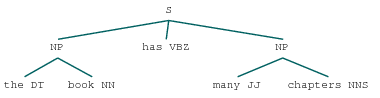

In [74]:
chunker.parse([('the', 'DT'), ('book', 'NN'), ('has', 'VBZ'),
('many', 'JJ'), ('chapters', 'NNS')])

### Here the chunk pattern is NP: {\<DT> \<NN.*><.*>*<\NN.*>} and the chink pattern is: }\<VB.*>{

### We can do chunking with training a taggerbased chunker rather than defining regular expression chunk pattern. 

In [75]:
from nltk.chunk import ChunkParserI
from nltk.chunk.util import tree2conlltags, conlltags2tree
from nltk.tag import UnigramTagger, BigramTagger

def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

class TagChunker(ChunkParserI):
    def __init__(self, train_chunks, tagger_classes=[UnigramTagger,BigramTagger]):
        train_sents = conll_tag_chunks(train_chunks)
        self.tagger = backoff_tagger(train_sents, tagger_classes)
        
    def parse(self, tagged_sent):
        if not tagged_sent: return None
        (words, tags) = zip(*tagged_sent)
        chunks = self.tagger.tag(tags)
        wtc = zip(words, chunks)
        return conlltags2tree([(w,t,c) for (w,(t,c)) in wtc])

In [76]:
from nltk.corpus import treebank_chunk

In [87]:
chunks = treebank_chunk.chunked_sents()

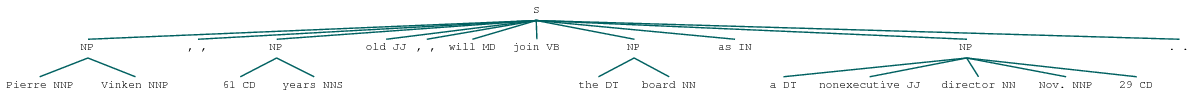

In [91]:
chunks[0]

In [92]:
chunker = TagChunker(chunks)

/home/shauqi/anaconda3/lib/python3.5/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


In [97]:
treebank.tagged_sents()[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

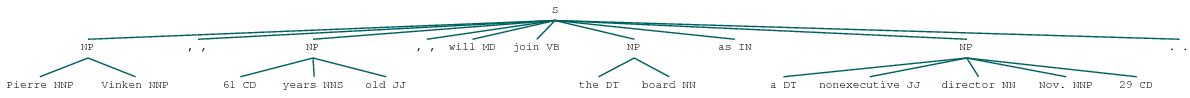

In [96]:
chunker.parse(treebank.tagged_sents()[0])

### TagChunker works like PosTagger. Instead of (word,pos) tuple, (pos,iob) tuple is used. 

In [99]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

In [100]:
from nltk.tree import Tree

In [101]:
t = Tree('S', [Tree('NP', [('the', 'DT'), ('book', 'NN')])])

In [102]:
tree2conlltags(t)

[('the', 'DT', 'B-NP'), ('book', 'NN', 'I-NP')]

### From the above cell you can see the list contain (word,pos,iob) tuple

### So after getting the chunk we have to apply transformations

filter insignificant words, swap verb phrase, swap infinitive phase, singularize plural noun

### Filter Insignificant words

### In English words like a,all,an,and,or,that,the are insignificant. If we remove these words it doesn't affect much to the sentence. The POS tags are:
### a - DT
### all - PDT
### an - DT
### and - CC
### or - CC
### that - DT

In [103]:
def filter_insignificant(chunk, tag_suffixes=['DT','CC']):
    good = []
    for word, tag in chunk:
        ok = True
        for suffix in tag_suffixes:
            if tag.endswith(suffix):
                ok = False
                break
                
        if ok:
            good.append((word,tag))
    return good

In [104]:
filter_insignificant([('the', 'DT'), ('terrible', 'JJ'),
('movie', 'NN')])

[('terrible', 'JJ'), ('movie', 'NN')]

### Swapping verb phrases

In [105]:
def first_chunk_index(chunk,pred,start=0,step=1):
    l = len(chunk)
    end = l if step > 0 else -1
    for i in range(start,end,step):
        if pred(chunk[i]):
            return i
    return None

In [106]:
def swap_verb_phrase(chunk):
    def vbpred(wt):
        word,tag=wt
        return tag != 'VBG' and tag.startswith('VB') and len(tag) > 2
    vbidx = first_chunk_index(chunk,vbpred)
    
    if vbidx is None:
        return chunk
    return chunk[vbidx+1:] + chunk[:vbidx]

In [107]:
swap_verb_phrase([('the', 'DT'),('book', 'NN'),('was', 'VBD'),('great', 'JJ')])

[('great', 'JJ'), ('the', 'DT'), ('book', 'NN')]

### The above code samples are for filtering english words. If we want to filter bangla chunks then we have to transform it with our own techniques. Suppose a given chunk is: 
### কুঁড়ের_NN সামনের_NST দিকে_PSP একটি_QC মাত্র_QF দরজা_NN. 
### If we remove the PSP, QT and QF and singularize NN then the meaning of the sentence does't change much.The sentence will be:
### কুঁড়ে_NN সামনে_NST দরজা_NN 

### So after transorming a chunk we can refactor the tree of chunk and untag pos from them.

In [109]:
from nltk.tree import Tree

In [110]:
t = Tree('S', [Tree('NP', [('the', 'DT'), ('book', 'NN')])])

In [111]:
tree2conlltags(t)

[('the', 'DT', 'B-NP'), ('book', 'NN', 'I-NP')]

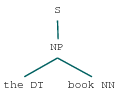

In [112]:
t

In [113]:
from nltk.tag import untag

In [115]:
untag([('the', 'DT'), ('book', 'NN')])

['the', 'book']

### Go to Opinion2.ipynb.......